In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Administrator/Downloads/housing.csv")

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


In [6]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

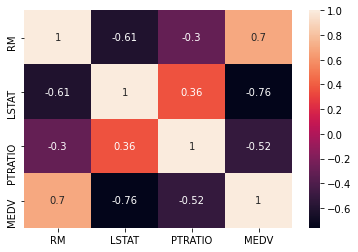

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

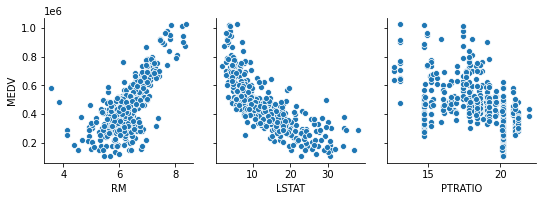

In [9]:
sns.pairplot(x_vars=['RM', 'LSTAT', 'PTRATIO'],y_vars=["MEDV"],data=df)

In [13]:
x=df.drop("MEDV",axis=1)

In [15]:
y=df["MEDV"]

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [18]:
ypred=model.predict(xtest)

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [20]:
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R-squared :",score)

MSE: 9727501160.084393
RMSE: 98628.09518633316
MAE: 72450.99978129727
R-squared : 0.6574622113312862


### Standard Scaler for Scaling the Data

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [22]:
model=LinearRegression()
model.fit(sc_xtrain,ytrain)

LinearRegression()

In [23]:
sc_ypred=model.predict(sc_xtest)

In [24]:
mse=mean_squared_error(ytest,sc_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,sc_ypred)
print("MAE:",mae)
score=r2_score(ytest,sc_ypred)
print("R-squared :",score)

MSE: 9727501160.084393
RMSE: 98628.09518633316
MAE: 72450.99978129727
R-squared : 0.6574622113312862


### Min Max Scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(xtrain)
mm_xtrain=mm.transform(xtrain)
mm_xtest=mm.transform(xtest)

In [26]:
model=LinearRegression()
model.fit(mm_xtrain,ytrain)

LinearRegression()

In [27]:
mm_ypred=model.predict(mm_xtest)

In [28]:
mse=mean_squared_error(ytest,mm_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,mm_ypred)
print("MAE:",mae)
score=r2_score(ytest,mm_ypred)
print("R-squared :",score)

MSE: 9727501160.084394
RMSE: 98628.09518633316
MAE: 72450.9997812973
R-squared : 0.6574622113312862


### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5) 
poly_features=pf.fit_transform(xtrain)
poly_features

array([[1.00000000e+00, 6.20900000e+00, 1.32200000e+01, ...,
        1.44051246e+06, 2.20108560e+06, 3.36323216e+06],
       [1.00000000e+00, 5.42700000e+00, 1.81400000e+01, ...,
        2.71224348e+06, 3.02024908e+06, 3.36323216e+06],
       [1.00000000e+00, 5.34900000e+00, 1.97700000e+01, ...,
        3.22156907e+06, 3.29163860e+06, 3.36323216e+06],
       ...,
       [1.00000000e+00, 6.02100000e+00, 1.03000000e+01, ...,
        5.98321290e+05, 1.03399213e+06, 1.78689902e+06],
       [1.00000000e+00, 6.03000000e+00, 1.88000000e+01, ...,
        2.02709822e+06, 1.93005628e+06, 1.83765997e+06],
       [1.00000000e+00, 6.02000000e+00, 1.01100000e+01, ...,
        4.67548400e+05, 7.67685800e+05, 1.26049301e+06]])

In [30]:
model=LinearRegression()
model.fit(poly_features,ytrain)

LinearRegression()

In [31]:
pf_ypred=model.predict(pf.fit_transform(xtest))

In [32]:
mse=mean_squared_error(ytest,pf_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,pf_ypred)
print("MAE:",mae)
score=r2_score(ytest,pf_ypred)
print("R-squared :",score)

MSE: 6063266114.353223
RMSE: 77866.97704645547
MAE: 58334.71204491173
R-squared : 0.7864921594208807
